In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("netflix_titles_nov_2019.csv")
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [4]:
df.keys()


Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

### Check for missing values

In [5]:
print(df.isnull().sum())

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64


In [6]:
# There are 1901 missing director names, 556 entries missing on cast, 427 on Country, Date added has 642 entries missing and for the rating we have 10 missing.

In [9]:
# Fill categorical columns with specified values
df["country"].fillna("Not Specified", inplace=True)
df["director"].fillna("Netflix", inplace=True)
df["cast"].fillna("Not Mentioned", inplace=True)
df["date_added"].fillna("Not Specified", inplace=True)

# Handle 'rating' column correctly
if df["rating"].dtype == "object":  # If categorical
    df["rating"].fillna(df["rating"].mode()[0], inplace=True)
else:  # If numeric
    df["rating"].fillna(df["rating"].mean(), inplace=True)

# Apply forward fill (using ffill() to avoid the warning)
df.ffill(inplace=True)


In [10]:
print(df.isnull().sum())


show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64


In [11]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,Netflix,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Not Specified,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,Mati Diop,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 29, 2019",2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [12]:
df["date_added"] = pd.to_datetime(df["date_added"])

##### We convert date columns to DateTime format to make it easier to analyze trends over time. This allows us to:
Extract Date Components – Easily access year, month, or day (e.g., df["date_added"].dt.year).
Sort and Filter – Sort records chronologically or filter by specific time periods.
Perform Time-Based Analysis – Identify trends such as seasonal content releases.
Improve Performance – DateTime operations are more efficient than string-based date manipulations.

## Exploratory Data Analysis

In [15]:
(df.head())


(df.tail())

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",United States,2008-02-04,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show
5836,70053412,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,NR,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",Movie


In [18]:
df.shape

(5837, 12)

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5837 non-null   int64         
 1   title         5837 non-null   object        
 2   director      5837 non-null   object        
 3   cast          5837 non-null   object        
 4   country       5837 non-null   object        
 5   date_added    5837 non-null   datetime64[ns]
 6   release_year  5837 non-null   int64         
 7   rating        5837 non-null   object        
 8   duration      5837 non-null   object        
 9   listed_in     5837 non-null   object        
 10  description   5837 non-null   object        
 11  type          5837 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 547.3+ KB
None


In [22]:
df


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,Netflix,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Not Specified,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,Mati Diop,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",2019-11-29,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",United States,2008-02-04,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


## Content Distribution

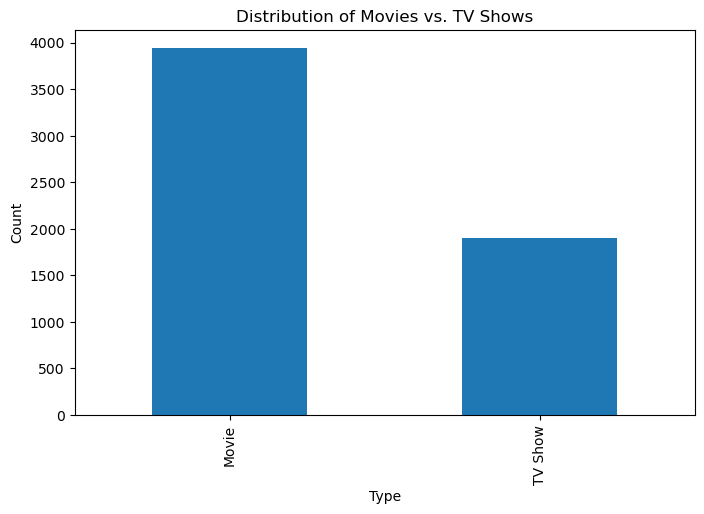

In [23]:
df["type"].value_counts().plot(kind="bar", title="Distribution of Movies vs. TV Shows", figsize=(8,5))
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

## Content Release Trends Over Time

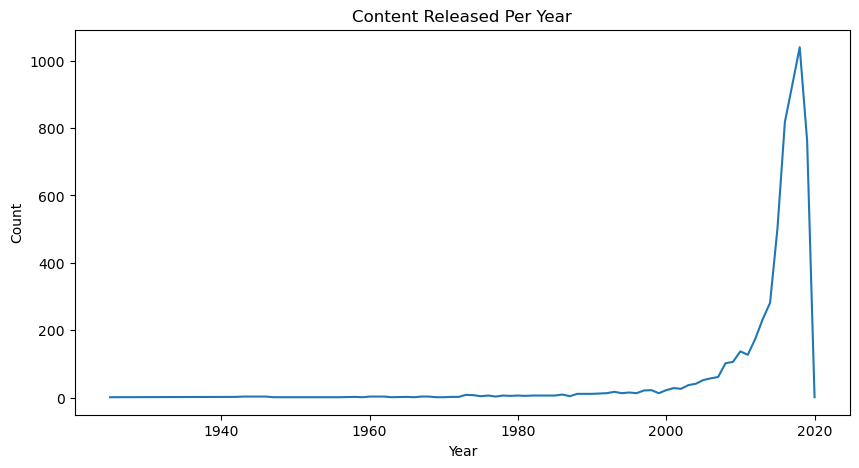

In [24]:
df.groupby("release_year")["title"].count().plot(figsize=(10, 5), title="Content Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

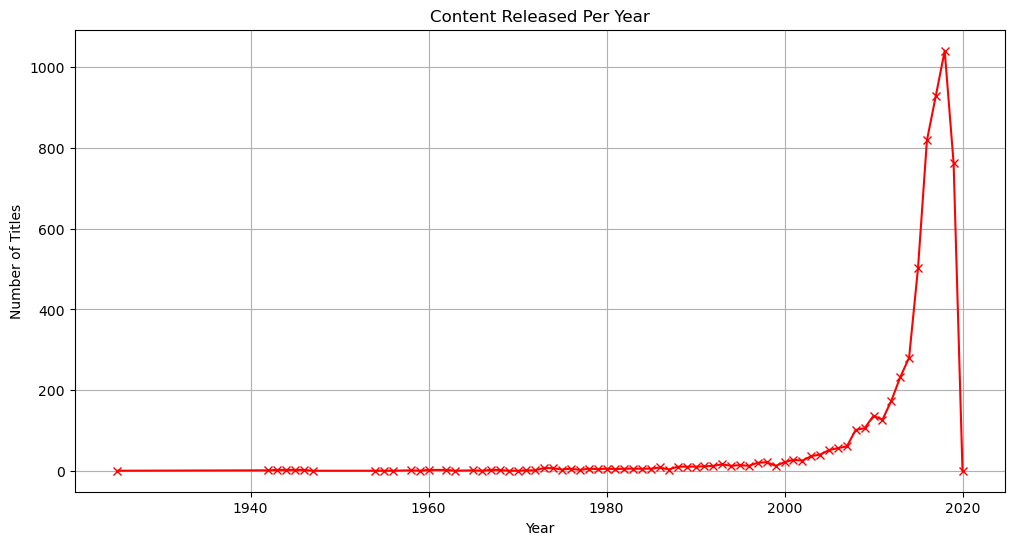

In [29]:
df.groupby("release_year")["title"].count().plot(
    kind="line", color="red", figsize=(12, 6),marker="x", grid=True,
    title="Content Released Per Year"
)
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

## Most common genres

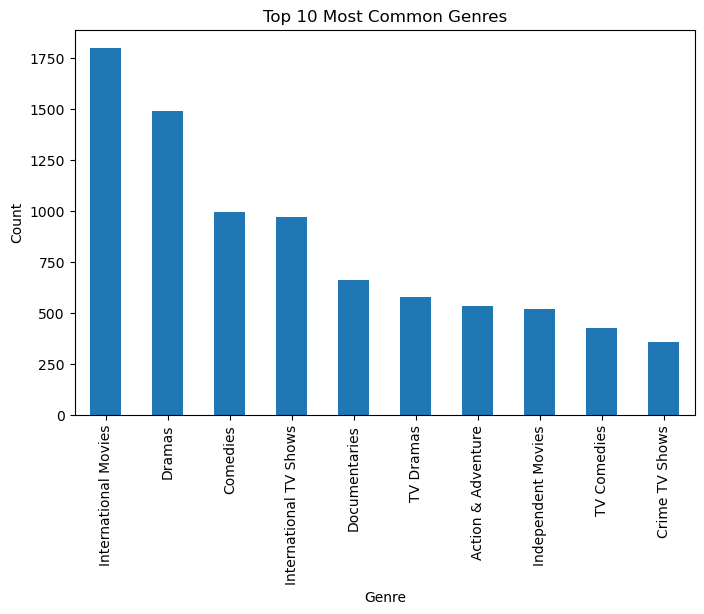

In [30]:
genre_counts = df["listed_in"].str.split(", ").explode().value_counts().head(10)
genre_counts.plot(kind="bar", title="Top 10 Most Common Genres", figsize=(8,5))
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

## Movie Duration

C:\Users\PapaDay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


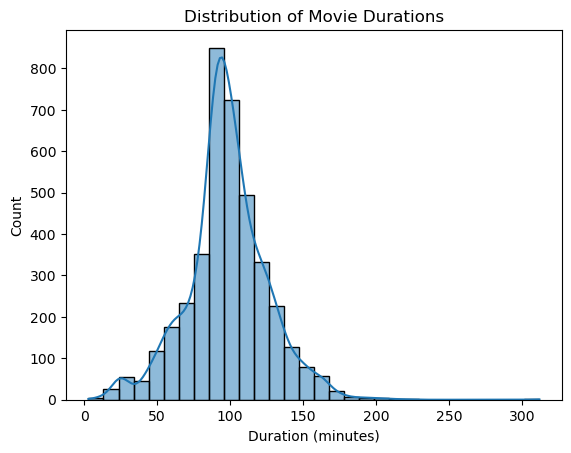

In [34]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.histplot(df[df["type"] == "Movie"]["duration"].dropna().str.replace(" min", "").astype(float), bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.show()

##  Country-wise Content Production

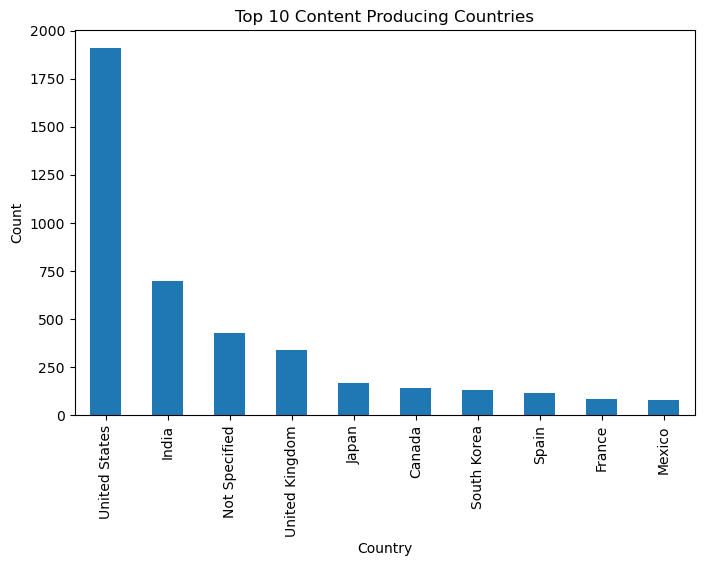

In [36]:
top_countries = df["country"].value_counts().head(10)
top_countries.plot(kind="bar", title="Top 10 Content Producing Countries", figsize=(8,5))
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

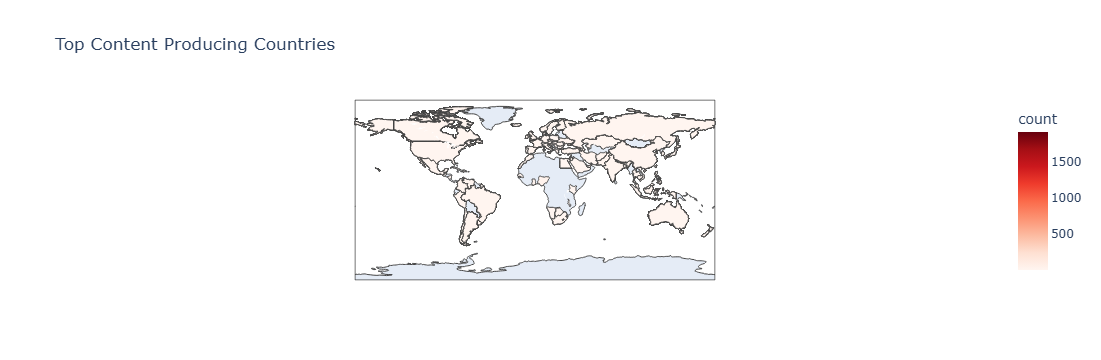

In [40]:
import plotly.express as px

# Prepare data: Get country counts
country_counts = df["country"].value_counts().reset_index()
country_counts.columns = ["country", "count"]  # Rename columns

# Create a choropleth map
fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",  # Ensures country names match
    color="count",
    color_continuous_scale="Reds",  # Adjust color scheme
    title="Top Content Producing Countries",
)

# Show the interactive map
fig.show()


## Most featured actors/directors

In [41]:
from collections import Counter

directors = Counter(
    ",".join(df["director"].dropna()).split(", ")
)
actors = Counter(
    ",".join(df["cast"].dropna()).split(", ")
)

print("Top 5 Directors:", directors.most_common(5))
print("Top 5 Actors:", actors.most_common(5))

Top 5 Directors: [('Jan Suter,Raúl Campos', 11), ('Gabriel Sabloff,Bruce MacDonald', 9), ('Koichi Sakamoto,Charlie Haskell', 9), ('John Paul Tremblay', 8), ('John Voorhees,Coerte Voorhees', 8)]
Top 5 Actors: [('Anupam Kher', 25), ('Andrea Libman', 24), ('Takahiro Sakurai', 24), ('Paresh Rawal', 21), ('Om Puri', 20)]


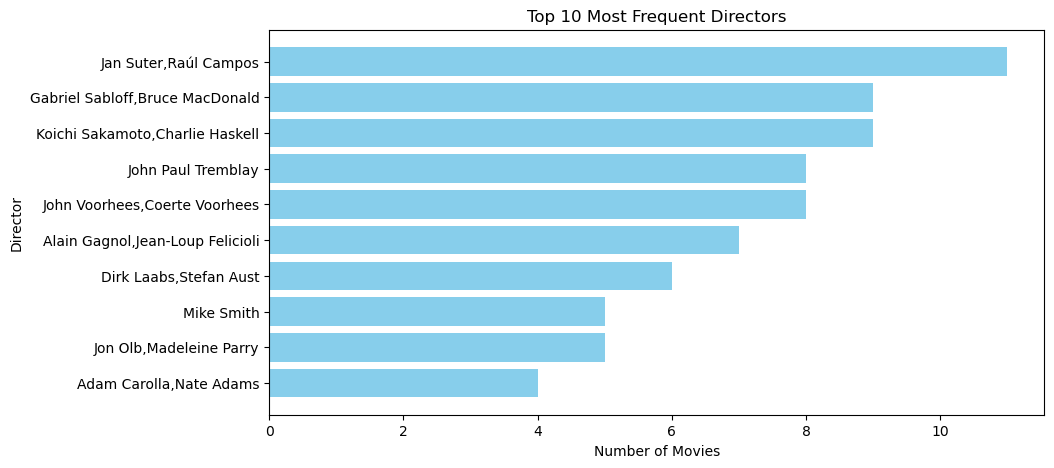

In [42]:
import matplotlib.pyplot as plt

# Get top 10 directors
top_directors = dict(directors.most_common(10))

plt.figure(figsize=(10, 5))
plt.barh(list(top_directors.keys()), list(top_directors.values()), color="skyblue")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.title("Top 10 Most Frequent Directors")
plt.gca().invert_yaxis()  # Flip to show highest at top
plt.show()


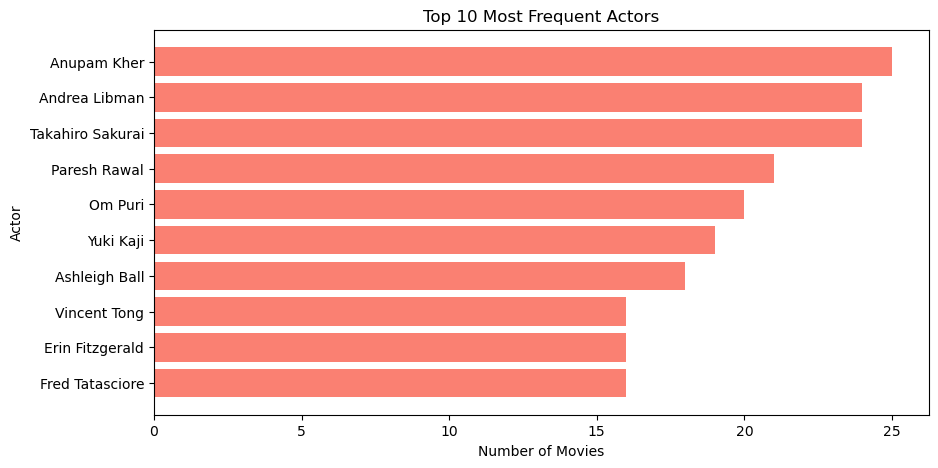

In [43]:
# Get top 10 actors
top_actors = dict(actors.most_common(10))

plt.figure(figsize=(10, 5))
plt.barh(list(top_actors.keys()), list(top_actors.values()), color="salmon")
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.title("Top 10 Most Frequent Actors")
plt.gca().invert_yaxis()  # Flip to show highest at top
plt.show()


## Content Released by Month 2019

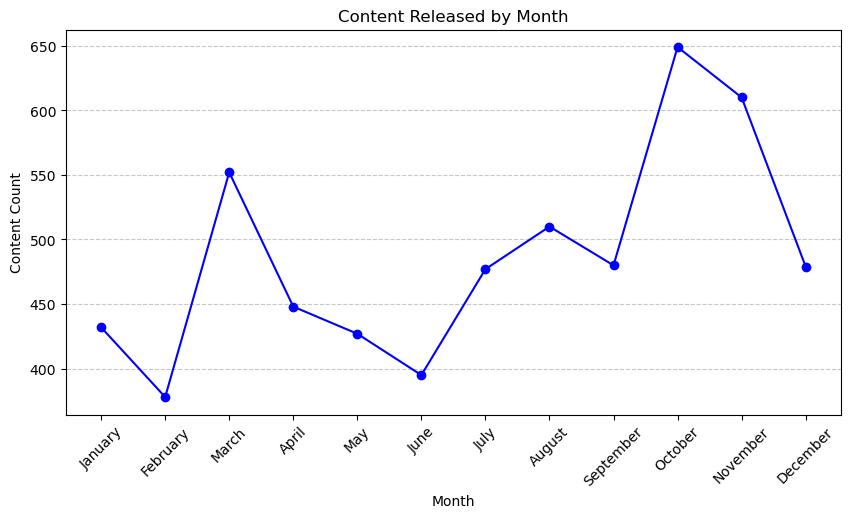

In [44]:
import calendar
import matplotlib.pyplot as plt

# Convert 'date_added' to datetime if not already
df["date_added"] = pd.to_datetime(df["date_added"])

# Extract the month
df["Month"] = df["date_added"].dt.month

# Group and count titles per month
monthly_counts = df.groupby("Month")["title"].count()

# Plot with month names
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts.index, monthly_counts.values, marker="o", linestyle="-", color="b")
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)], rotation=45)
plt.xlabel("Month")
plt.ylabel("Content Count")
plt.title("Content Released by Month")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Content release by season

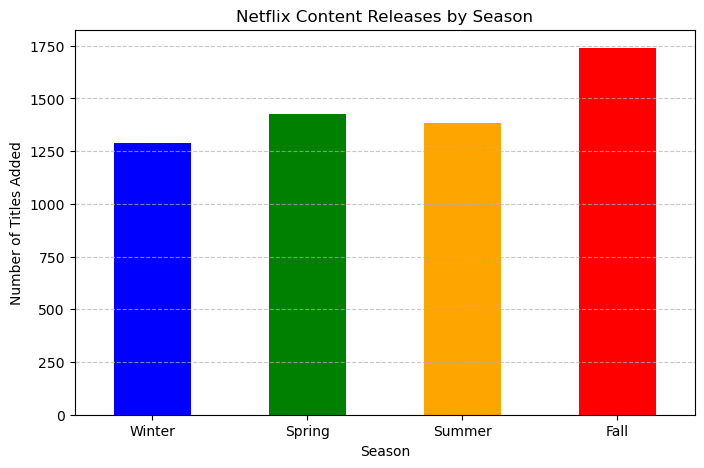

In [45]:

# Convert 'date_added' to datetime (if not already)
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# Extract Month
df["Month"] = df["date_added"].dt.month

# Define Seasons Mapping
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Unknown"  # Handle NaN values

# Apply Season Mapping
df["Season"] = df["Month"].apply(get_season)

# Count Titles per Season
season_counts = df["Season"].value_counts()

# 📊 Plot the Season Distribution
plt.figure(figsize=(8, 5))
season_counts.loc[["Winter", "Spring", "Summer", "Fall"]].plot(kind="bar", color=["blue", "green", "orange", "red"])
plt.xlabel("Season")
plt.ylabel("Number of Titles Added")
plt.title("Netflix Content Releases by Season")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Final cleaned csv contents

In [46]:
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,Month,Season
0,81193313,Chocolate,Netflix,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,11,Fall
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Not Specified,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,11,Fall
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,11,Fall
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,11,Fall
4,80213643,Chip and Potato,Mati Diop,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",2019-11-29,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,11,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,11,Fall
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,11,Fall
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,5,Spring
5835,70157452,Dinner for Five,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",United States,2008-02-04,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,2,Winter


In [47]:
df.to_csv("cleaned_netflix_data.csv", index=False)